## Combining images
some code from
https://forums.fast.ai/t/classifier-with-multiple-images-as-input-and-multiple-labels-as-output/29704

take an array of paths to different image channels, convert into different color layers of a single image

In [2]:
from PIL import Image
from fastai.vision import *
from matplotlib import pyplot as plt

def createMultiChannelImage(fpArr):
    ''' Open multiple images and return a single multi channel image '''
    mat = None
    nChannels = len(fpArr)
    for i,fp in enumerate(fpArr):
        #print('Loading: ', fp)
        img = PIL.Image.open(fp)
        chan = pil2tensor(img, np.float32).float().div_(255)
        if(mat is None):
            mat = torch.zeros((nChannels,chan.shape[1],chan.shape[2]))
        mat[i,:,:]=chan
    return Image(mat)

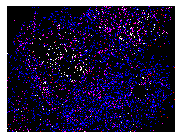

In [11]:
# Usage sample
img = createMultiChannelImage([Path('../image_samples/stod_2018_canny_auto.jpg'),Path('../image_samples/stod_2018_canny_tight.jpg'),Path('../image_samples/stod_2018_canny_wide.jpg')])
img.show()
img.save('multichannel_1.jpg')

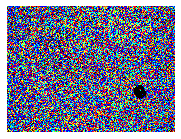

In [12]:
# Usage sample 2
img = createMultiChannelImage([Path('../image_samples/stod_2018_sobel_x.jpg'),Path('../image_samples/stod_2018_sobel_y.jpg'),Path('../image_samples/stod_2018_prewitt.jpg')])
img.show()
img.save('multichannel_2.jpg')

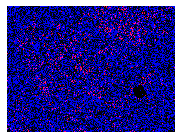

In [4]:
# Usage sample 3
img = createMultiChannelImage([Path('../image_samples/stod_2018_canny_auto.jpg'),Path('../image_samples/stod_2018_laplacian.jpg'),Path('../image_samples/stod_2018_prewitt.jpg')])
img.show()
img.save('multichannel_3.jpg')

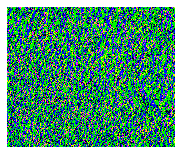

In [5]:
# Create paper samples
img = createMultiChannelImage([Path('../paper_images/canny.jpg'),
                               Path('../paper_images/prewitt.jpg'),
                               Path('../paper_images/sobel_x.jpg')])
img.show()
img.save('multichannel_3.jpg')